# GAN (Generative Adversarial Networks)

- GAN consits of two neural networks
    - Discriminator and Generator
- __Generator__ is trained to generate the data
- __Discriminator__ is trained to distinguished..
    - input is generated by generator or real image

- Generative model vs Discriminative model
    - There are two types of probabilistic model of ML
- e.g. Multiple class classification
    - Genetative model
    - By sampling latent factor from a generative model, you can generate new data.
        - Latent factor: data representatives in a latent space
        - In multiclass classification problem, generative process is following,
            1. sample a class label y
            2. sample x from the conditional distribution $p(x \mid y)$
    - Generative model is often used for the unlabled unsupervised learning
        - $p(y=c \mid x, \Sigma, \pi, \mu)=\frac{p(x \mid y=c, \mu_{c}, \Sigma_{c})p(y=c, \pi_{c})}{\sum_{c=1}^{c=C}p(x)_c}$
        - $p(x)_c = p(x \mid y=c, \mu_{c}, \Sigma_{c})p(y=c, \pi_{c})$
        - __Softmax__ $p(y=c \mid x, \Sigma, \pi, \mu)=\frac{\exp(W_c*x+W_c0)}{\sum_{l=1}^{l=C}\exp(Wl*x+Wl_0)}$
            - $W_c = \Sigma^{-1}\mu_c$
            - $W_c0 = -\frac{1}{2}\mu^T\Sigma_{-1}\mu_c + \log{p(y=c)}$
    1. Obtain maximum likelihood of $\Sigma, \pi, \mu$
    2. Derive the $W_c, W_c0$ by evaluating the above equation
    - we assume that we are given the label 
        - class prior: p(y=c, $\pi$)
        - class conditional: p(x, y=c, $\mu_{c}$, $\Sigma_{c}$)
            - Gauss distribution
            - In Naive Bayes,
                - we assume that each attribute is independent each other in the condition(y=c)
                - Each dimension can be treated as different distribution
                - Hence the $\Sigma_{c}$ is diagonal and different from each class
        - In Linear discriminative analysis
            - we assume that every class condition has same covariance
            - Hence the $\Sigma$=$\Sigma_{c1}$=$\Sigma_{c2}$
        - Generative model should be normalized by the sum of each class likelihood(=__Softmax__)
    - Discriminative model: logistic regression
        - Let the $W_c, W_c0$ be free variable
        - Learn the $W_c, W_c0$ it self directly
        - W={W_c={1toC}, W_c0={1toC}} //absorbing bias
        - Loss function = Cross Entropy loss
        - Minimization problem of the nagative log likelihood
            - __Softmax__ 
                - $p(y=c \mid x, \Sigma, \pi, \mu)=\frac{\exp(W_c*x+W_c0)}{\sum_{l=1}^{l=C}\exp(Wl*x+Wl_0)}$
            - __Negative Log Likelihood__ 
                - $-\log{p(y=c \mid x, W)}=-\sum_{i=1}^{N}\sum_{c=1}^{C}y_ic\log(\frac{\exp(W_c*x+W_c0)}{\sum_{l=1}^{l=C}\exp(Wl*x+Wl_0)})$
                - $y_ic$ is one hot vector (corresponing to the label column(row) is 1, others are zero)
            - $W_c = \Sigma^{-1}\mu_c$
            - $Wl*x+Wl_0$ is a prediction
            - Each presition are normalized by the aggregated exponential of the prediction among classes

- Architecture of generative adversarial networks
    - The role of the __generator__
        - __Objective__ try to get better at fooling the discriminator
        - Estimate the probability distribution of the real samples in order to provide generated samples resembling real data
        - Construct the probability distribution as much similar as possible to the real world data distribution
    - The role of the __discriminator__
        - __Objective__ try to get better at identifying generated samples
        - Estimate the probability that a given sample came from the real data rather tan being provided by the generator (real or fake)
    - Generative Adversarial Networks has the two model which are trained to compete with each other.

## Tutorial
- https://realpython.com/generative-adversarial-networks/#implementing-the-generator

### toysample
- we consider the data which consists of two feature $x_1,x_2$
- Especially, we want to estimate the $x_2=\sin(x_1)$

![](fig_gan.webp)

Development environment on Anaconda
- conda create --name gan
- conda activate gan
- conda install -c pytorch pytorch=1.4.0
- conda install matplotlib jupyter

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
## setting the random generator seed manually
## we can ensure that we have same random initialization or random sampling on any machine
torch.manual_seed(111)

## Preparing training data
## __This is real-data__
- two feature input
    - x1 is the input [0, $2\pi$]
    - x2 = sin(x1)
    - two dimensional input feature space

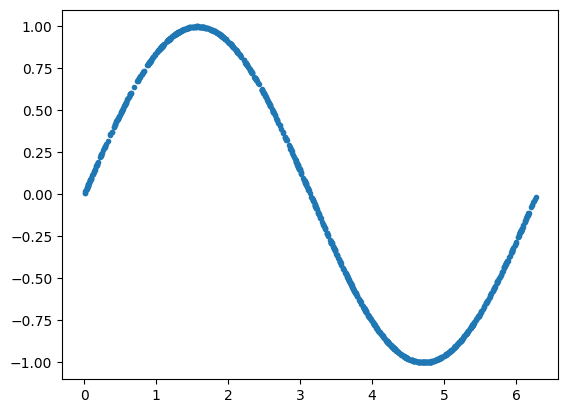

In [3]:
train_data_length=1024
train_data = torch.zeros((train_data_length, 2))


train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])

plt.plot(train_data[:, 0], train_data[:, 1], '.')
plt.show()


## Create dataset

In [4]:
# label of the training data = 0
train_labels = torch.zeros(train_data_length)
# list of the train_data and its label pair
# Creat dataset
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

### Structure of the generator
- Args:
    - input: random data from a latent space $z=(z_1, z_2)$
    - output: generated data which is resembling to the real-data
- can be MLP and CNN
- e.g. 
    - Decoder part in Autoencoder
    - MLP (Multiple Perceptron)
    - CNN (Convolutional Neural Network)

### Structure of the discriminator
__real-world images are used for this discriminator training only__
- Args:
    - input: generated data or sampled data from real-world data distribution
    - output: the probability that the input belongs to the real-dataset
        - high prob: the input is from real-world
        - low prob: the input is generated by the generator

### Minmax game
- D is adapted to minimize the discrimination error between real and generated samples
- G is adapted to maximize the probability of D making a mistake

To train discriminator, at each iteration you label some real samples taken from the training data as 1 and some generated samples provided from the generator as 0.
We can train the discriminator which can minimize the binary cross entropy as binary classification problem
![](fig_train_discriminator.webp)

After updates of parameter of discriminator, we can train generator to produce better generated samples. The output of generator is connected to D, whose paramters are kept frozen.
![](fig_train_generator.webp)

Now we can consider this model as single classifier such that
- input: random data z
- output: probability of $p(y=1 \mid z)$
- label associated with each input: 1
    - Every generated data should be classified as class 1 (fool the discriminator)
We freeze the parameter of discriminator, using the binary cross entropy as a loss function, we can optimize the paramters of generator such that minimize the loss function (misclassifincation).
When generator can do a good enough job, the output probability should be close to 1.

- At the end
    - __Generator__ will be able to generateo more closely resemble the real data
    - __Discriminator__ will have more trouble to distinguish between real and generated. 

## Create dataloader

In [5]:
## Create data_loader
from torch.utils.data import DataLoader
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)


In [6]:
print(torch.cuda.is_available())
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

True
cuda


In [7]:
## test dataloading
for data, label in train_loader:
    data, label = data.to(device), label.to(device)
    # print(data.shape)
    # print(label)

## Discriminator model structure

In [8]:
class Descriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(2, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
discriminator = Descriminator()
discriminator.to(device)

Descriminator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

## Generator model structure

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__();
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
generator = Generator()
generator.to(device)

Generator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)

- Hyperparamter
    - learining rate
    - number of epochs

## loss function (Discriminator>Binary classification)

In [12]:
lr = 0.001
num_epochs=300
loss_function = nn.BCELoss()


## Optimizer

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

## training
![](fig_train_discriminator.webp)

In [14]:
for epoch in range(num_epochs):
    for i, (data, _) in enumerate(train_loader):
        data = data.to(device)
        # Data for training the discriminator
        # input = real_sample and generated_sample
        # label = real_label(1), generated_sample_label(0)
        real_sample_labels = torch.ones((batch_size, 1)).to(device)
        latent_space_sampels = torch.randn((batch_size, 2)).to(device)
        generateed_samples = generator(latent_space_sampels).to(device)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device)
        # torch.cat: concatenating the real_sample and generated sample
        # [real sample, 1] + [generated sample, 0]
        all_samples = torch.cat((data, generateed_samples)).to(device)
        all_samples_labels = torch.cat((real_sample_labels, generated_samples_labels)).to(device)

        # Training the descriminator
        discriminator.zero_grad()
        # obtain the output from the discriminator
        output_discriminator = discriminator(all_samples)
        # obtain loss of the binary classificaiton
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        # calculate the gradients
        loss_discriminator.backward()
        # update the paramteres in discriminator
        optimizer_discriminator.step()

        # Data for the training the generator
        latent_space_samples = torch.randn((batch_size, 2)).to(device)

        # training generator
        generator.zero_grad()
        generated_samples = generator(latent_space_sampels)
        output_discriminator_generated = discriminator(generated_samples)

        loss_generator = loss_function(output_discriminator_generated, real_sample_labels)
        loss_generator.backward()
        optimizer_generator.step()

        ## Show loss
        if epoch % 10 == 0 and i==batch_size -1:
            print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G : {loss_generator}")


Epoch: 0 Loss D: 0.15460892021656036
Epoch: 0 Loss G : 2.867964744567871
Epoch: 10 Loss D: 0.5033161640167236
Epoch: 10 Loss G : 1.5817294120788574
Epoch: 20 Loss D: 0.5275872349739075
Epoch: 20 Loss G : 2.652956962585449
Epoch: 30 Loss D: 0.3378365635871887
Epoch: 30 Loss G : 1.9720369577407837
Epoch: 40 Loss D: 0.38755160570144653
Epoch: 40 Loss G : 3.1039326190948486
Epoch: 50 Loss D: 0.24170663952827454
Epoch: 50 Loss G : 2.4284746646881104
Epoch: 60 Loss D: 0.2559365928173065
Epoch: 60 Loss G : 2.922394275665283
Epoch: 70 Loss D: 0.1997629702091217
Epoch: 70 Loss G : 3.33795428276062
Epoch: 80 Loss D: 0.13675269484519958
Epoch: 80 Loss G : 3.161766529083252
Epoch: 90 Loss D: 0.23098625242710114
Epoch: 90 Loss G : 3.4107048511505127
Epoch: 100 Loss D: 0.1485624760389328
Epoch: 100 Loss G : 2.9344120025634766
Epoch: 110 Loss D: 0.23350408673286438
Epoch: 110 Loss G : 2.3778138160705566
Epoch: 120 Loss D: 0.14115235209465027
Epoch: 120 Loss G : 2.650719165802002
Epoch: 130 Loss D: 0.

## test
- Discriminator

In [15]:
test_data_length = 124
test_data = torch.zeros(test_data_length, 2)
test_data_label = torch.ones((test_data_length, 1))
test_data[:, 0] = 2 * torch.pi * torch.randn(test_data_length)
test_data[:, 1] = torch.sin(test_data[:, 0])
test_set = [
    (test_data[i], test_data_label[i]) for i in range(test_data_length)
]


In [16]:
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, pin_memory=True, num_workers=2)


In [17]:
for data, label in test_loader:
    print(data.shape)
    print(label.shape)

torch.Size([32, 2])
torch.Size([32, 1])
torch.Size([32, 2])
torch.Size([32, 1])
torch.Size([32, 2])
torch.Size([32, 1])
torch.Size([28, 2])
torch.Size([28, 1])


In [18]:
def test_discriminator(dataloader, generated_sample_flag):
    for i, (data, label) in enumerate(dataloader):
        with torch.no_grad():
            if generated_sample_flag:
                data, label = data, label.to(device)
            else:
                data, label = data.to(device), label.to(device)
            # print(data.shape)
            pred = discriminator(data)
            # print(pred.shape)
            loss = loss_function(pred, label)
            avg_pred = torch.mean(pred)
            avg_loss = torch.mean(loss)
            print(f"Test{i}: pred:{avg_pred}, loss:{avg_loss} ")

In [19]:
test_discriminator(test_loader, False)

Test0: pred:0.624160647392273, loss:37.500850677490234 
Test1: pred:0.6730692982673645, loss:25.161361694335938 
Test2: pred:0.8457731008529663, loss:9.780838012695312 
Test3: pred:0.5050602555274963, loss:46.49834442138672 


In [20]:
latent_samples = torch.randn((test_data_length, 2))
latent_samples = latent_samples.to(device)
generated_sample = generator(latent_samples)
pred_generated_sample = discriminator(generated_sample)
loss_generated_sample = loss_function(pred_generated_sample, test_data_label.to(device))
avg_pred =torch.mean(pred_generated_sample)
avg_loss =torch.mean(loss_generated_sample)
print(avg_pred)
print(avg_loss)


tensor(0.0520, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(3.3814, device='cuda:0', grad_fn=<MeanBackward0>)


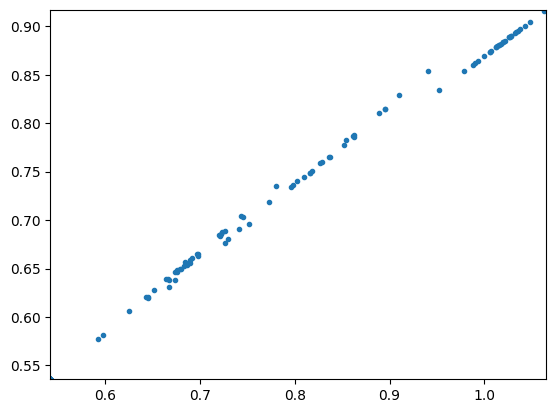

In [21]:
generated_sample = generated_sample.detach().cpu()
plt.xlim(torch.min(generated_sample[:, 0]), torch.max(generated_sample[:, 0]))
plt.ylim(torch.min(generated_sample[:, 1]), torch.max(generated_sample[:, 1]))
plt.plot(generated_sample[:, 0], generated_sample[:, 1], '.')
plt.show()